# Regresion Lineal : Costo de un incidente de seguridad.

En este ejercicio se explican los fundamentos basicos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad.

### Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria

# 1.- Generacion del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)


print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

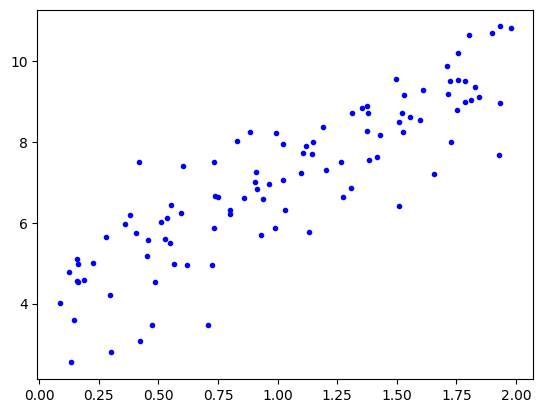

In [3]:
plt.plot(X,y, "b.")
plt.show()

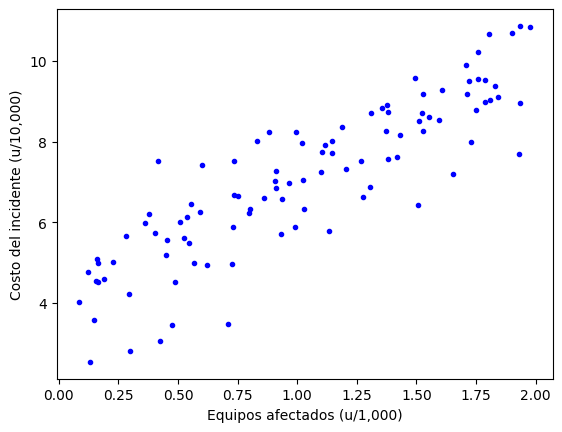

In [4]:
plt.plot(X,y,"b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# 3.- Modificacion del DataSet

In [5]:
import pandas as pd


In [6]:
data = {'No_Equipos_Afectados': X.flatten(),'Costo': y.flatten()}
df= pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.733469,7.514180
1,1.188510,8.371345
2,0.156090,4.553944
3,1.526334,8.257509
4,0.086367,4.021777
5,0.158250,5.092942
6,0.749744,6.640276
7,0.725684,4.962020
8,0.593276,6.246454
9,0.163875,4.991766


In [7]:
# Escalado del numero de equipos afectados
df['No_Equipos_Afectados'] =df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados']= df['No_Equipos_Afectados'].astype('int')

# Escalado del Costo
df['Costo'] = df['Costo']*10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,733,75141
1,1188,83713
2,156,45539
3,1526,82575
4,86,40217
5,158,50929
6,749,66402
7,725,49620
8,593,62464
9,163,49917


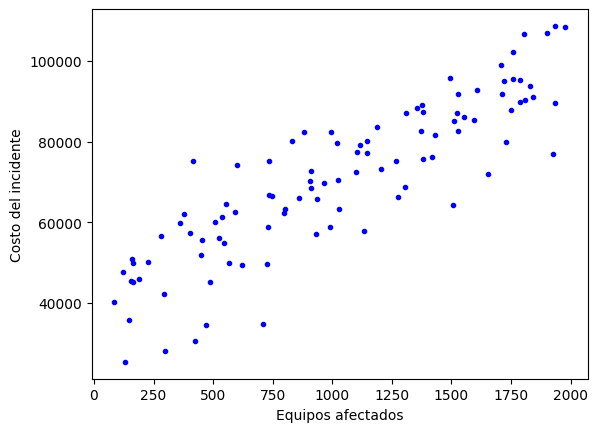

In [8]:
plt.plot(df['No_Equipos_Afectados'],df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 4.- Construccion del modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [11]:
# Parametro Tetha 0
lin_reg.intercept_

np.float64(39605.94898338528)

In [12]:
# Parametro Tetha 1
lin_reg.coef_

array([30.22301543])

In [14]:
# Prediccion para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()],[df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

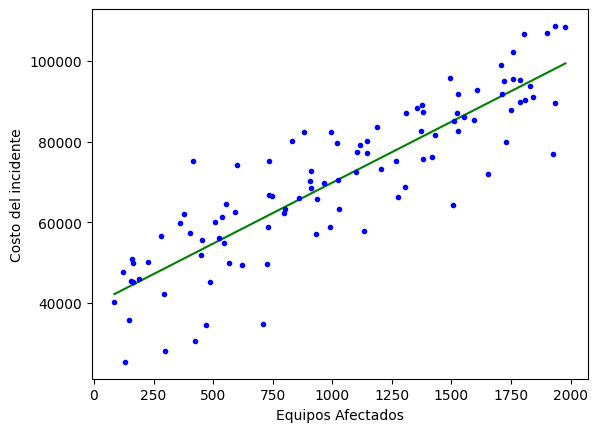

In [15]:
# Representacion grafica de la funcion de hipotesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'],"b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 5.- Prediccion de nuevos ejemplos

In [21]:
x_new =np.array([[2700]]) #Numero de equipos afectados

# Prediccion del costo que tendria el incidente
Costo= lin_reg.predict(x_new)
print("El costo del incidente seria: $ ", int(Costo[0]))

El costo del incidente seria: $  121208


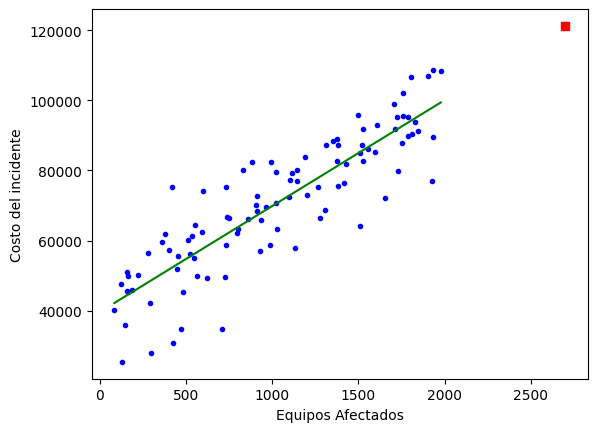

In [22]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'],"b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()